In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the Titanic dataset
titanic_data = pd.read_csv("../../data/Titanic-Dataset.csv")

# Display basic information about the dataset
print("Dataset Shape:", titanic_data.shape)
print("Columns:", titanic_data.columns)
titanic_data.head()

Dataset Shape: (891, 12)
Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check for missing values
print("Missing Values:\n", titanic_data.isnull().sum())

# Summary statistics
print("Summary Statistics:\n", titanic_data.describe())

# Data types and non-null counts
print("Dataset Info:")
titanic_data.info()

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Summary Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204

/tmp/ipykernel_110004/1824774600.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=titanic_data, palette="Set2")


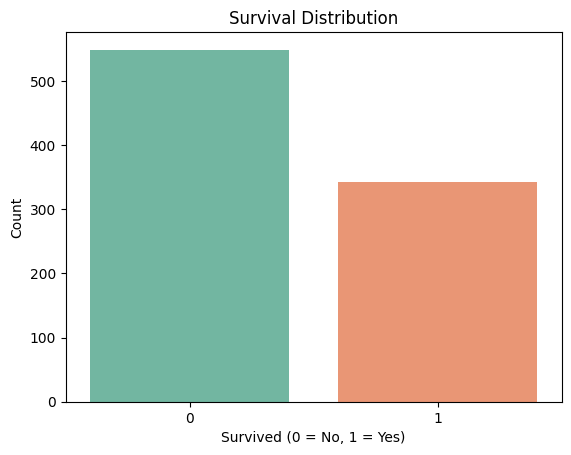

In [5]:
# Survival distribution
sns.countplot(x="Survived", data=titanic_data, palette="Set2")
plt.title("Survival Distribution")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

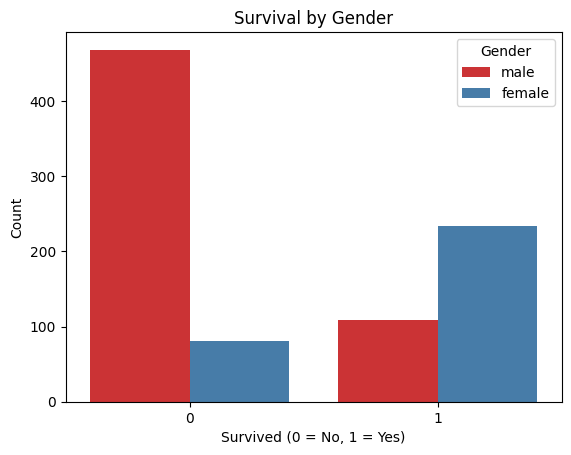

In [6]:
# Survival by gender
sns.countplot(x="Survived", hue="Sex", data=titanic_data, palette="Set1")
plt.title("Survival by Gender")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

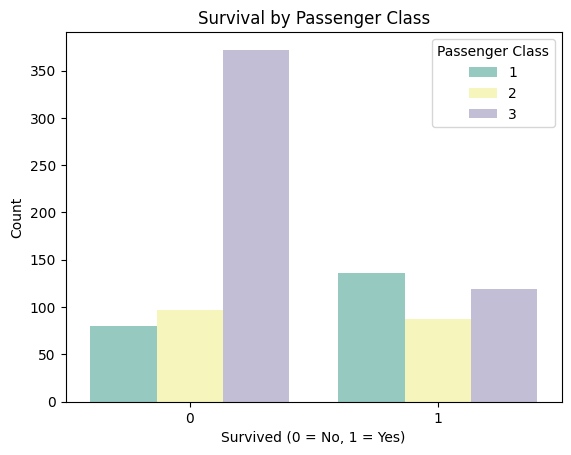

In [7]:
# Survival by passenger class
sns.countplot(x="Survived", hue="Pclass", data=titanic_data, palette="Set3")
plt.title("Survival by Passenger Class")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Passenger Class")
plt.show()

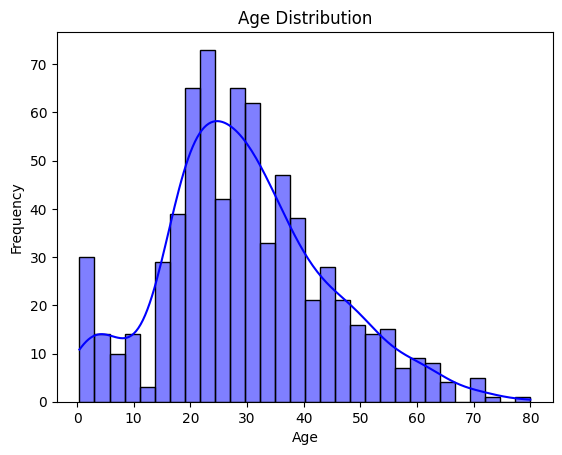

In [8]:
# Age distribution
sns.histplot(titanic_data["Age"].dropna(), kde=True, bins=30, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

/tmp/ipykernel_110004/1337380368.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Age", data=titanic_data, palette="Set2")


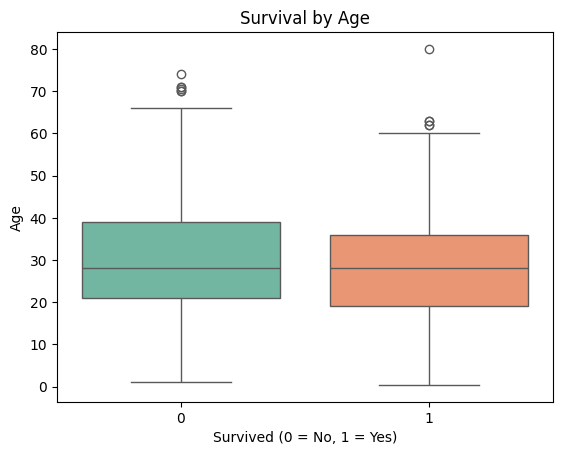

In [9]:
# Survival by age
sns.boxplot(x="Survived", y="Age", data=titanic_data, palette="Set2")
plt.title("Survival by Age")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

In [10]:
# Fill missing Age values with the median
titanic_data["Age"].fillna(titanic_data["Age"].median(), inplace=True)

# Fill missing Embarked values with the mode
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0], inplace=True)

# Drop rows with missing Cabin values (optional)
titanic_data.drop(columns=["Cabin"], inplace=True)

# Verify missing values are handled
print("Missing Values After Handling:\n", titanic_data.isnull().sum())

Missing Values After Handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipykernel_110004/378544046.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data["Age"].fillna(titanic_data["Age"].median(), inplace=True)
/tmp/ipykernel_110004/378544046.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [11]:
# Create a FamilySize feature
titanic_data["FamilySize"] = titanic_data["SibSp"] + titanic_data["Parch"] + 1

# Create an IsAlone feature
titanic_data["IsAlone"] = (titanic_data["FamilySize"] == 1).astype(int)

# Create a Title feature from the Name column
titanic_data["Title"] = titanic_data["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)

# Display the updated dataset
titanic_data.head()

<>:8: SyntaxWarning: invalid escape sequence '\.'
<>:8: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_110004/392486073.py:8: SyntaxWarning: invalid escape sequence '\.'
  titanic_data["Title"] = titanic_data["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,Mr


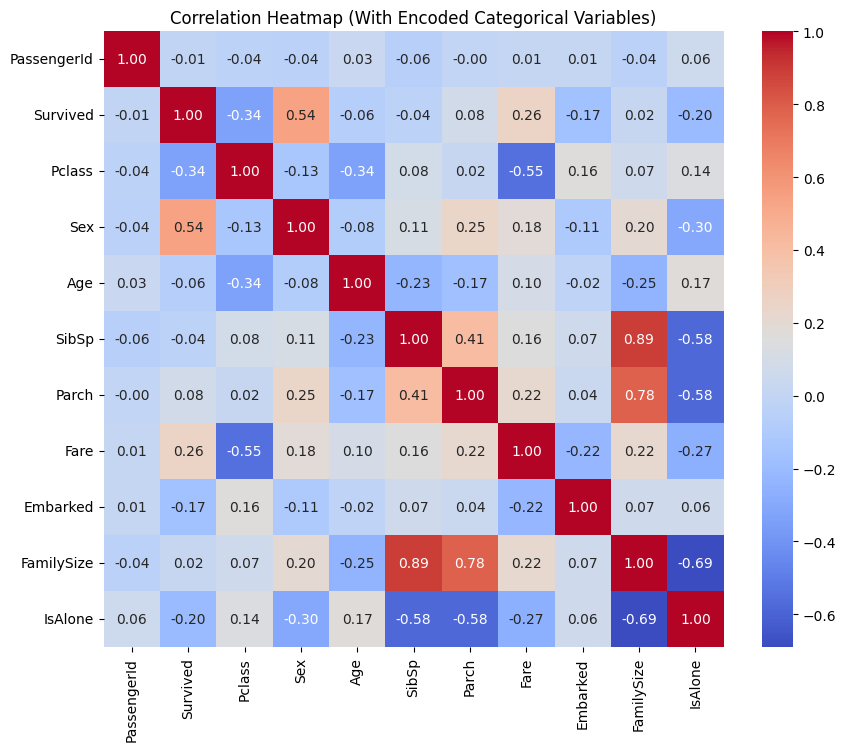

In [17]:
# Encode categorical variables
titanic_data["Sex"] = titanic_data["Sex"].map({"male": 0, "female": 1})
titanic_data["Embarked"] = titanic_data["Embarked"].map({"C": 0, "Q": 1, "S": 2})

# Recompute the correlation heatmap
numeric_data = titanic_data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (With Encoded Categorical Variables)")
plt.show()

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the process of analyzing and summarizing datasets to uncover patterns, relationships, and insights. It is a critical step in any data science or machine learning project, as it helps you understand the data and prepare it for modeling.

## 1. Goals of EDA

### Understand the Dataset:
- Identify the structure, size, and types of data.
- Check for missing values, outliers, and inconsistencies.

### Visualize Relationships:
- Use plots and charts to explore relationships between features.

### Feature Engineering:
- Create new features or transform existing ones to improve model performance.

### Prepare for Modeling:
- Clean and preprocess the data to ensure it is ready for machine learning algorithms.

## 2. Key Steps in EDA

### a. Data Overview
**Purpose:** Understand the structure and content of the dataset.  
**Methods:**
- Use `.head()`, `.info()`, and `.describe()` to get an overview of the data.
- Check for missing values using `.isnull().sum()`.

### b. Univariate Analysis
**Purpose:** Analyze individual features.  
**Methods:**
- Use histograms, boxplots, and count plots to visualize distributions.  
**Example:** Analyze the distribution of `Age` or the survival rate (`Survived`).

### c. Bivariate Analysis
**Purpose:** Explore relationships between two variables.  
**Methods:**
- Use scatter plots, bar plots, and boxplots to analyze relationships.  
**Example:** Analyze survival rates by `Sex` or `Pclass`.

### d. Multivariate Analysis
**Purpose:** Explore relationships between multiple variables.  
**Methods:**
- Use pair plots, heatmaps, and correlation matrices.  
**Example:** Analyze how `Pclass`, `Sex`, and `Age` together affect survival.

### e. Handle Missing Values
**Purpose:** Address missing or incomplete data.  
**Methods:**
- Fill missing values with the mean, median, or mode.
- Drop columns or rows with excessive missing values.

### f. Feature Engineering
**Purpose:** Create new features to enhance the dataset.  
**Methods:**
- Combine existing features (e.g., `FamilySize = SibSp + Parch + 1`).
- Extract information from text (e.g., `Title` from the `Name` column).

## 3. Example: Titanic Dataset EDA

### a. Dataset Overview
The Titanic dataset contains information about passengers, including:
- **Demographics:** `Age`, `Sex`, `Pclass`.
- **Travel Details:** `SibSp`, `Parch`, `Embarked`.
- **Target Variable:** `Survived` (0 = No, 1 = Yes).

### b. Visualizations
- **Survival Distribution:**  
    Use a count plot to visualize the number of survivors and non-survivors.
- **Survival by Gender:**  
    Use a bar plot to analyze survival rates by gender.
- **Survival by Passenger Class:**  
    Use a bar plot to analyze survival rates by passenger class.
- **Age Distribution:**  
    Use a histogram to visualize the distribution of passenger ages.
- **Correlation Heatmap:**  
    Use a heatmap to analyze correlations between numeric features.

### c. Insights
- **Gender:** Females had a higher survival rate than males.
- **Passenger Class:** First-class passengers had a higher survival rate than those in second or third class.
- **Age:** Younger passengers had a higher survival rate.

## 4. Correlation Heatmap

### Purpose:
A correlation heatmap shows the relationships between numeric features in the dataset.  
Correlation values range from -1 to 1:
- **1:** Perfect positive correlation.
- **-1:** Perfect negative correlation.
- **0:** No correlation.

### Steps:
1. **Encode Categorical Variables:**  
     Convert non-numeric columns (e.g., `Sex`, `Embarked`) into numeric values.  
     **Example:** Map `Sex` to `{male: 0, female: 1}`.
2. **Select Numeric Columns:**  
     Use `select_dtypes(include=[np.number])` to filter numeric columns.
3. **Compute Correlation Matrix:**  
     Use `.corr()` to calculate pairwise correlations between numeric features.
4. **Visualize with Heatmap:**  
     Use `sns.heatmap()` to create a heatmap of the correlation matrix.

### Insights from Heatmap:
- **Survived:**
    - Positively correlated with `Sex` (females are more likely to survive).
    - Negatively correlated with `Pclass` (first-class passengers are more likely to survive).
- **FamilySize:**  
    Positively correlated with `Parch` and `SibSp`.

## Key Takeaways
- EDA helps uncover patterns and relationships in the data.
- Visualizations like bar plots, histograms, and heatmaps provide valuable insights.
- Handling missing values and encoding categorical variables are essential steps in data preprocessing.
- Feature engineering can enhance the dataset and improve model performance.
